In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import random as rd
import matplotlib.pyplot as plt
from datetime import datetime

In [8]:
sigma = 0.024
rng = np.random.default_rng(42)

def ohrenstein_uhlenbeck_process():
    process = [83.2 + 1.92*-1.3]
    sigma = 0.024
    mr_level =  83.2*1.92*1
    mr_rate = 0.001

    process = [83.2 + 1.92*-1.3]
    for i in range(0,51,1):
        alfa = mr_rate * (mr_level - process[i])
        vol =  sigma * (process[i]* rng.normal())
        new_X = alfa + vol + process[i]
        process.append(new_X)
    return process

def wiener_process():
    vol_dep = (np.array(np.linspace(-4,4,52))**2)/8 +0.3

    process = [11.2]
    sigma = 0.094

    for i in range(0,51,1):
        sel = rng.normal() * vol_dep[i] * sigma * process[i] + process[i]
        process.append(sel)
    return process

In [3]:
def sto_cal_simulations(func):
    all  = []  
    for i in range(0,100,1):
        all.append(func())

    mean = []
    for i in range(0,52,1):
        b = []
        for j in range(0,100,1):
            sel = all[j][i]
            b.append(sel)
        mean.append(np.mean(b))
    return [all, mean]

In [9]:
oup = sto_cal_simulations(ohrenstein_uhlenbeck_process)
wp = sto_cal_simulations(wiener_process)

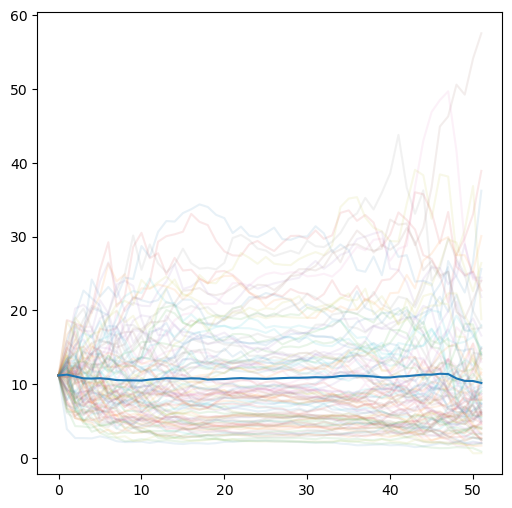

In [10]:
plt.figure(figsize=(6,6))
for i in range(0,100,1):
    plt.plot(wp[0][i], alpha=0.1)
plt.plot(wp[1])
plt.show()

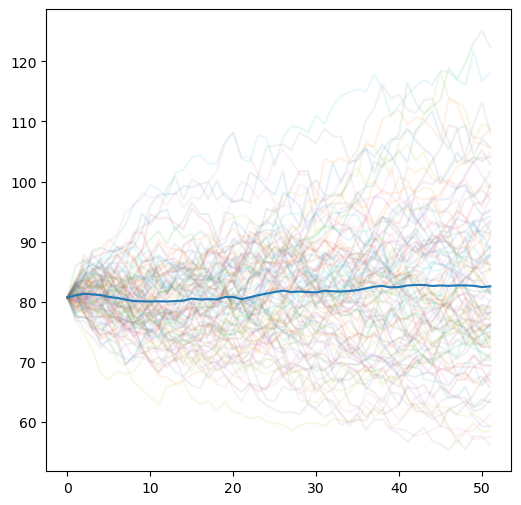

In [11]:
plt.figure(figsize=(6,6))
for i in range(0,100,1):
    plt.plot(oup[0][i], alpha=0.1)
plt.plot(oup[1])
plt.show()

In [12]:
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 12, 31)
dates = pd.date_range(start=start_date, end=end_date, freq='W')

In [13]:
pr_1 = np.repeat(4.5, 26)
pr_2 = np.repeat(4.25, 26)
policy_rate = np.append(pr_1,pr_2)

In [14]:
forecast_df = pd.DataFrame({'FX_EURONOK': wp[1],
                        'Interest_rate':policy_rate,
                        'Food_index': oup[1],
                        'Date':dates})

In [15]:
forecast_df.head()

,FX_EURONOK,Interest_rate,Food_index,Date
0,11.200000,4.5,80.704000,2024-01-07
1,11.316159,4.5,81.085189,2024-01-14
2,11.059024,4.5,81.347014,2024-01-21
3,10.805923,4.5,81.222230,2024-01-28
4,10.782183,4.5,81.121354,2024-02-04


In [16]:
forecast_df.to_csv('data/forecast_df.csv', index=False)